# **Mental Health Data: Kaggle competition**

This notebook provides a comprehensive solution to the problem using **Gradient Boosting (XGBoost)**. The goal is to demonstrate a structured approach to solving a Kaggle competition problem. The workflow includes:

1. **Understanding the data** - loading the datasets and performing an initial exploration.
2. **Exploratory Data Analysis (EDA)** - analyzing the dataset to uncover insights, trends, and patterns.
3. **Data preprocessing** - preparing the data for machine learning by handling missing values, encoding categorical variables, and splitting the dataset.
4. **Model training and evaluation** - training a Gradient Boosting model, evaluating its performance, and improving it through hyperparameter tuning.
5. **Generating a submission file** - predicting on the test set and creating a submission file in the required format.

This notebook is designed to be clear and easy to follow, with an emphasis on thorough analysis and careful model evaluation.

---

## **Step 1: Import Libraries**

The first step is to import the libraries needed for the analysis. These include:
- **Data manipulation libraries:** `pandas` and `numpy`.
- **Visualization libraries:** `matplotlib` and `seaborn`.
- **Machine learning libraries:** `XGBoost` for Gradient Boosting, and `sklearn` for model evaluation and hyperparameter tuning.
- **Warnings filter:** Suppress unnecessary warnings for a cleaner notebook output.

---

## **Step 2: Load and Understand the Data**

In this step:
1. **Import dataset using kaggle.json and competition name**
2. **Load the training and test datasets** using `pandas`.
3. Display the basic structure of the datasets:
   - The number of rows and columns in each dataset.
   - The first few rows of the datasets to understand the format and types of features.
4. Check the target variable (if present) and assess its characteristics, such as class balance.

---

## **Step 3: Exploratory Data Analysis (EDA)**

EDA is a critical step in understanding the dataset. It involves:
1. **Target Variable Distribution:**
   - Visualize the target variable's distribution to identify if it is balanced or imbalanced.
   - An imbalanced dataset may require specific techniques such as oversampling or class-weight adjustments.
   
2. **Checking for Missing Values:**
   - Identify missing data in the training and test sets.
   - Decide on appropriate strategies to handle missing values (e.g., imputation or removal).
   
3. **Correlation Heatmap:**
   - Visualize the correlation between numerical features and the target variable.
   - Identify multicollinearity among features that may affect the model’s performance.
   
4. **Feature Distributions:**
   - Examine the distribution of numerical features using histograms or kernel density plots.
   - Detect skewness or outliers that may require transformation or removal.

5. **Relationships Between Features and Target:**
   - Use pairplots or scatterplots to explore how specific features interact with the target variable.
   - This step helps identify potential trends or groupings in the data.

---

## **Step 4: Data Preprocessing**

Data preprocessing is essential to prepare the dataset for machine learning. This step involves:
1. **Handling Missing Values:**
   - Replace missing values with appropriate statistics (e.g., mean, median) or use advanced imputation methods.
   
2. **Encoding Categorical Features:**
   - Convert categorical variables to numerical format using techniques such as one-hot encoding.
   - Ensure that the test dataset undergoes the same encoding as the training dataset.

3. **Align Features in Test and Train Sets:**
   - Ensure the columns in the test set align with those in the training set.
   - Handle any discrepancies by adding missing columns or reordering them.

4. **Train-Test Split:**
   - Split the training data into **training** and **validation** sets.
   - The validation set is used to evaluate model performance and prevent overfitting.

---

## **Step 5: XGB Model**

In this step:
1. **Model Initialization:**
   - Use the XGBoost implementation of Gradient Boosting for training.
   - Set hyperparameters such as `n_estimators`, `learning_rate`, `max_depth`, and `subsample` to initialize the model.

2. **Training the Model:**
   - Train the model on the training dataset using `fit()`.
   - Ensure that the model is trained only on the training split and not the validation set.

---

## **Step 6: Model Evaluation**

Evaluate the trained model on the validation set:
1. **Performance Metrics:**
   - Use metrics such as **Accuracy**, **F1 Score**, and **Classification Report** to assess performance.
   - Explain the importance of each metric:
     - **Accuracy:** Proportion of correct predictions.
     - **F1 Score:** Harmonic mean of precision and recall, especially useful for imbalanced datasets.
     - **Classification Report:** Detailed performance evaluation including precision, recall, and F1 score for each class.
   
2. **Visualizations:**
   - Optionally, create confusion matrices or ROC curves to visualize the model's performance.

---

## **Step 7: Hyperparameter Tuning**

To further improve the model:
1. Use **GridSearchCV** to optimize hyperparameters:
   - Example parameters to tune: `n_estimators`, `learning_rate`, `max_depth`, `subsample`, and `colsample_bytree`.
2. Evaluate the best parameters and retrain the model using these optimized settings.
3. Compare the performance of the tuned model with the initial model.

---

## **Step 8: Generate Submission**

Once the model is finalized:
1. **Make Predictions on Test Data:**
   - Use the trained model to generate predictions for the test dataset.
   
2. **Prepare Submission File:**
   - Combine the test set IDs and predictions into a DataFrame.
   - Save the DataFrame as a `.csv` file in the format required for the competition.

3. **Submit the File:**
   - Upload the submission file to Kaggle and evaluate the model's performance on the leaderboard.

---

## **Conclusion**

This notebook provides a robust framework for solving the Kaggle Playground Series competition using Gradient Boosting. Key takeaways include:
- Thorough data exploration to uncover insights and trends.
- Careful data preprocessing to ensure consistency between training and test datasets.
- Model evaluation using appropriate metrics to assess performance.
- Iterative improvement through hyperparameter tuning.



In [ ]:
#@title Import libaries
# Basic libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# @title Load data
#import data
from google.colab import files
files.upload()

# get json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# copy data file
!kaggle competitions download -c playground-series-s4e11
!unzip -q playground-series-s4e11.zip -d data

Saving kaggle.json to kaggle (1).json
playground-series-s4e11.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Load the data
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# Display dataset overview
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
train_data.head()

Train Data Shape: (140700, 20)
Test Data Shape: (93800, 19)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
# @title Exploratory Data Analysis

# Visualize target variable "Depression" distribution
sns.countplot(train_data['Depression'])
plt.title("Target Variable Distribution")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e41b254a4d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e41b25491b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# @title checking for missing values
# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

print("Missing Values in Training Data:\n", missing_train[missing_train > 0])
print("\nMissing Values in Test Data:\n", missing_test[missing_test > 0])

Missing Values in Training Data:
 Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

Missing Values in Test Data:
 Profession            24632
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Dietary Habits            5
Degree                    2
dtype: int64


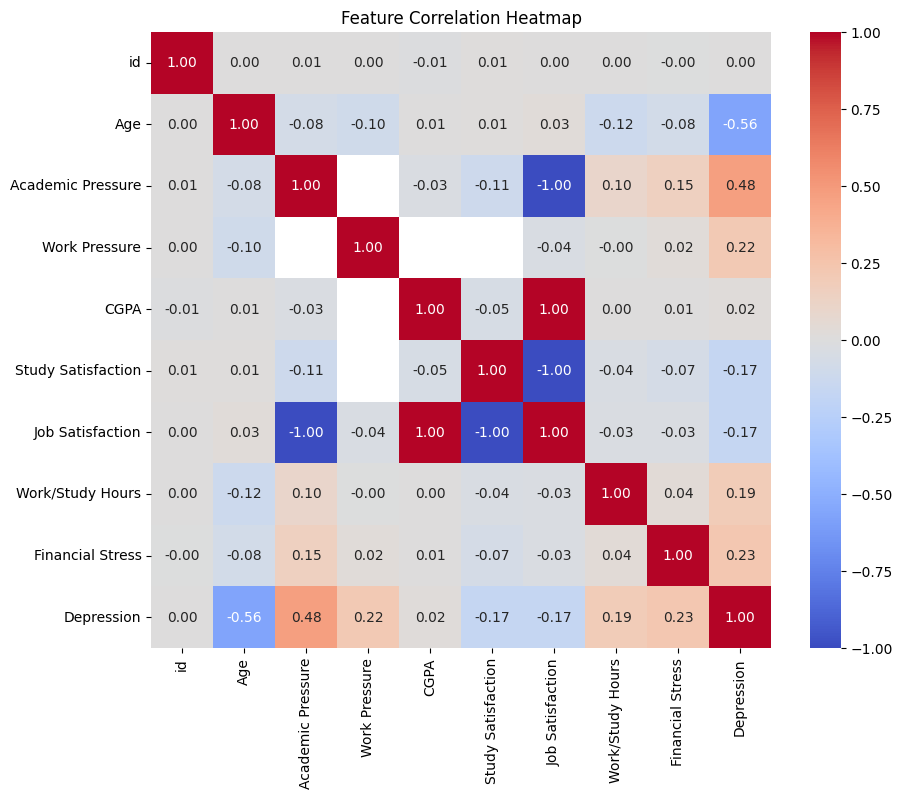

In [ ]:
# @title generating heatmap

# Select only numeric columns from the dataset
numeric_data = train_data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

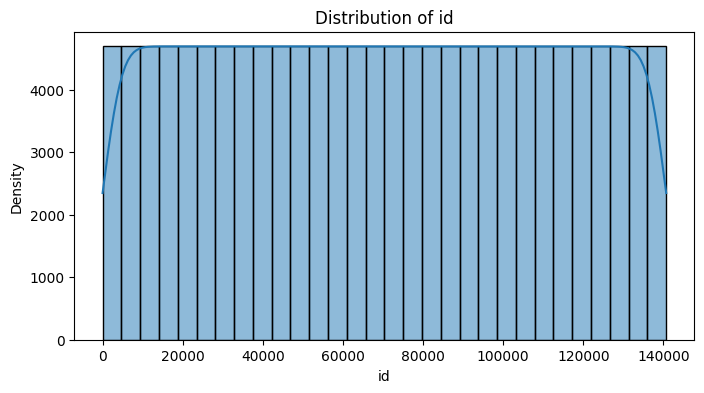

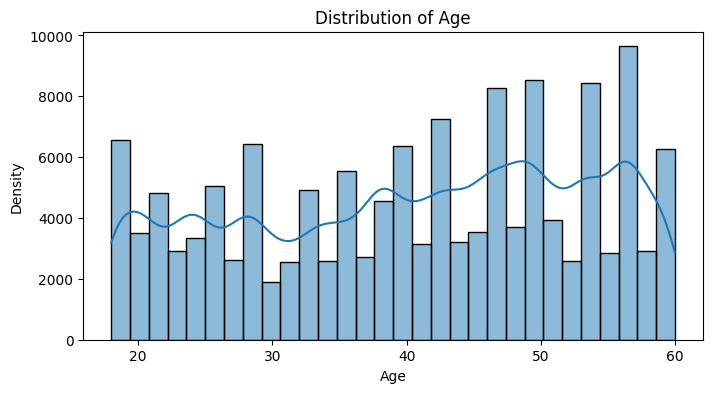

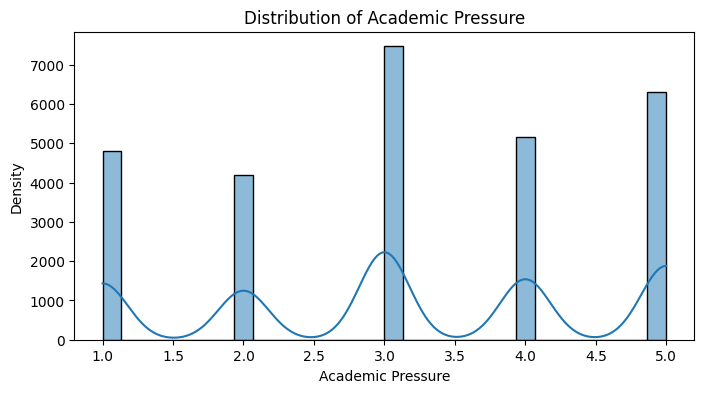

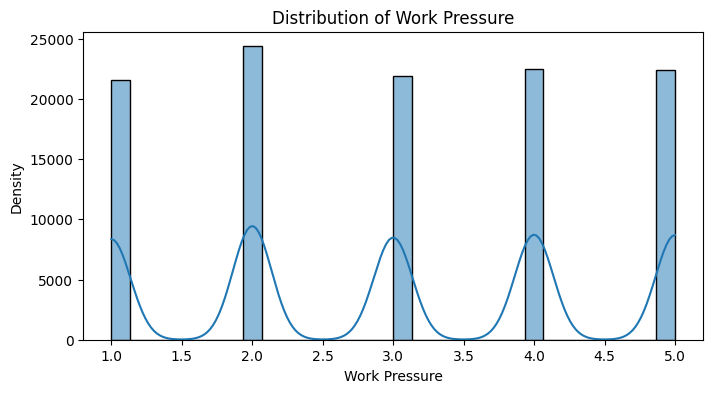

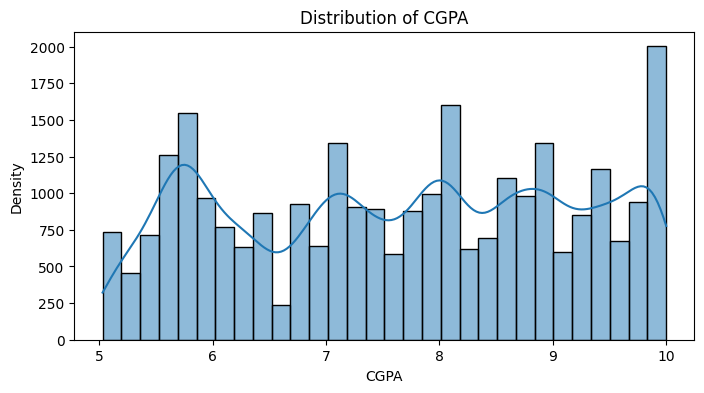

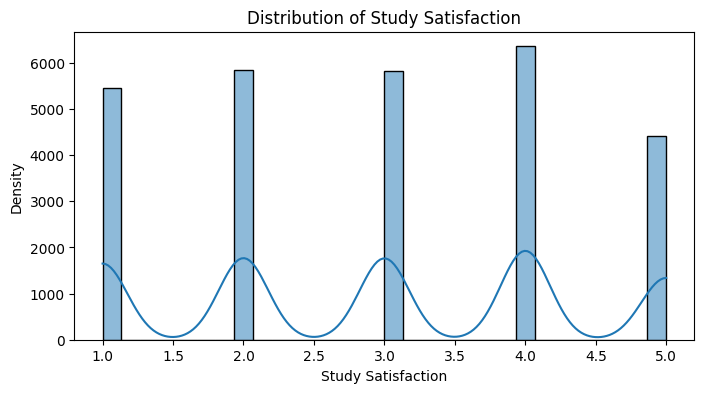

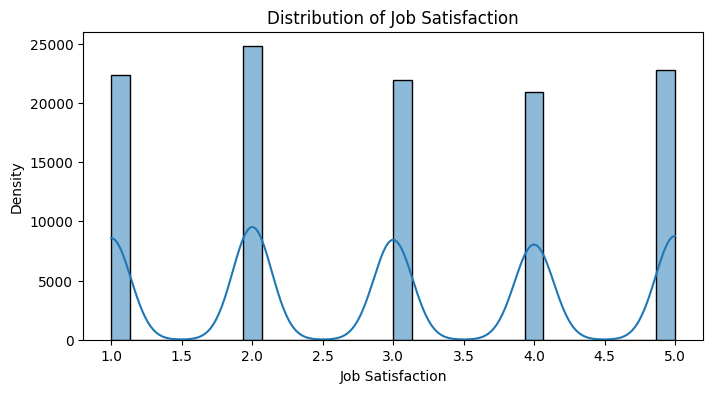

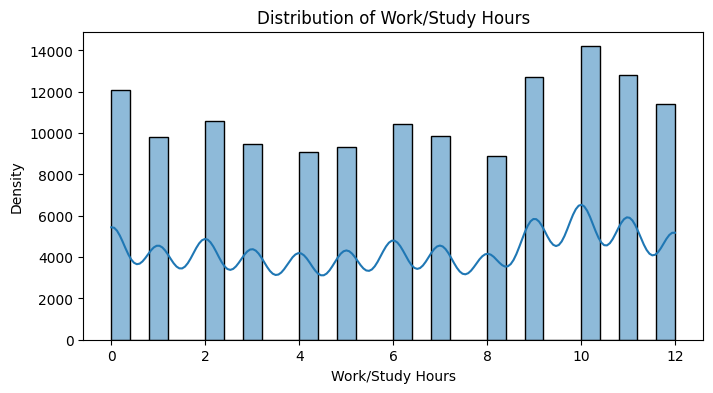

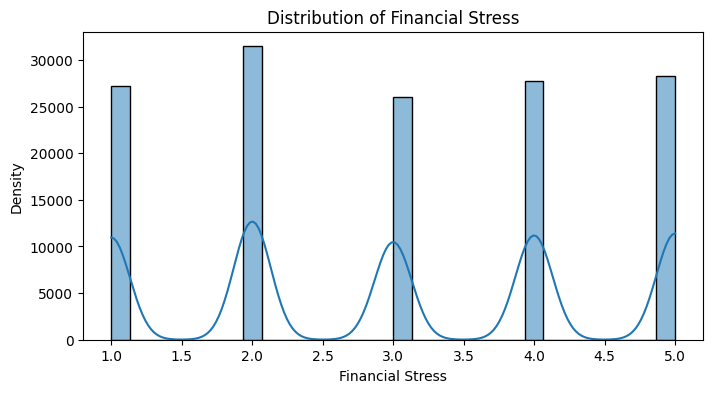

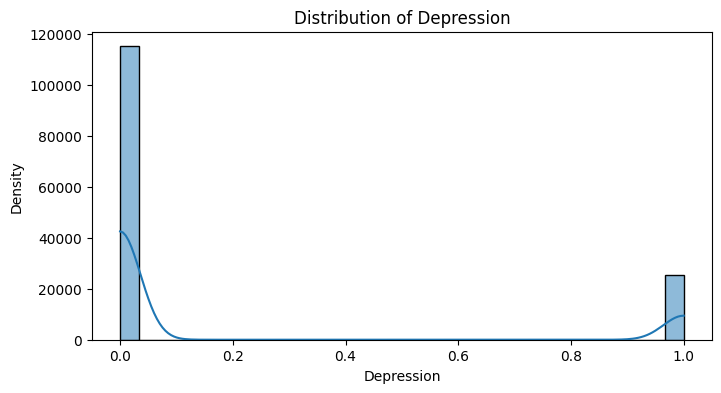

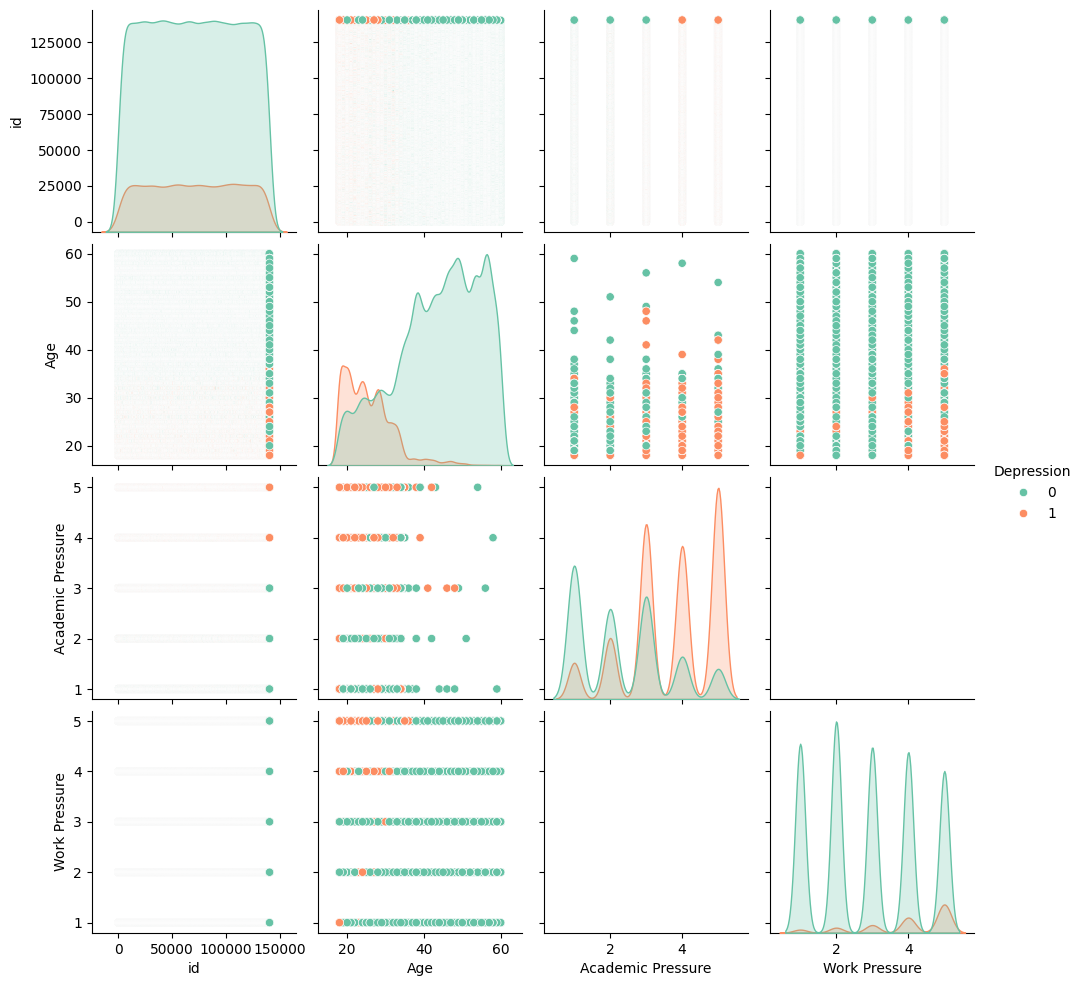

In [ ]:
# @title Plotting relationship between feature and target
# Visualize distributions of selected features
features = train_data.select_dtypes(include=[np.number]).columns

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

# Pairplot of numerical features with Depression
sns.pairplot(train_data, vars=features[:4], hue="Depression", palette="Set2")
plt.show()

In [ ]:
# @title Data preprocessing: missing values

# Align test_data with train_data to ensure matching columns
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# Handle missing values for numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Handle missing values for non-numeric columns
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns
train_data[non_numeric_columns] = train_data[non_numeric_columns].fillna("Unknown")

test_data[non_numeric_columns] = test_data[non_numeric_columns].fillna("Unknown")

In [ ]:
# @title encoding categorical features and splitting train test data
# One-hot encoding for categorical features
X = pd.get_dummies(train_data.drop(columns=["Depression"]), drop_first=True)
y = train_data["Depression"]
test_data = pd.get_dummies(test_data, drop_first=True)

# Align columns in test set to match training set
test_data = test_data.reindex(columns=X.columns, fill_value=0)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (112560, 768)
Validation Data Shape: (28140, 768)


In [ ]:
# @title XGB model
# Initialize Gradient Boosting model
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# @title evaluation on validation data
# Predict on validation data
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="weighted")

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Model Performance:
Accuracy: 0.94
F1 Score: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



In [17]:
# @title Hyperparameter tuning for better results
!pip install scikit-learn --upgrade # Upgrade scikit-learn to the latest version
# Define hyperparameter grid
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV for hyperparameter optimization
# Replaced GridSearchCV with RandomizedSearchCV as it supports n_iter
grid_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False),
    param_distributions=param_grid, # Changed to param_distributions
    n_iter=20,  # Number of random combinations to test
    scoring="accuracy",
    cv=2,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Update model with best parameters
model = grid_search.best_estimator_

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=  23.8s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=  24.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=  23.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=  26.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=  16.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=  16.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=  21.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=  19.4s
[CV] END colsampl

In [22]:
# @title Generate submission

# Predict on test data
test_predictions = model.predict(test_data)

# Create submission DataFrame
submission = pd.DataFrame({
    "id": test_data.id,
    "Depression": test_predictions
})

# Save submission file
submission.to_csv("submission.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [21]:
test_data.id

,id
0,140700
1,140701
2,140702
3,140703
4,140704
...,...
93795,234495
93796,234496
93797,234497
93798,234498
